<a href="https://colab.research.google.com/github/1961928/dgoh123.github.io/blob/main/Final_Project_Data_Science_regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the libraries I will use

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

read the file using pd.read_csv

In [ ]:
df = pd.read_csv('predictor_data2.csv')

In [ ]:
df.head()

,Unnamed: 0,CPI,GDP,Mortgage Rate,Income,Rental Vacancy Rate,House Supply,Employment Level,Consumer Sentiment,House Prices,House Values
0,2008-02-02,212.174,14706.538,5.68,63455.0,10.1,9.3,144607.0,78.4,183300.0,208073.977612
1,2008-02-09,212.687,14706.538,5.67,63455.0,10.1,9.7,144550.0,70.8,179900.0,208073.977612
2,2008-02-16,212.687,14706.538,5.72,63455.0,10.1,9.7,144550.0,70.8,180000.0,208073.977612
3,2008-02-23,212.687,14706.538,6.04,63455.0,10.1,9.7,144550.0,70.8,175500.0,208073.977612
4,2008-03-01,212.687,14706.538,6.24,63455.0,10.1,9.7,144550.0,70.8,182000.0,206639.455023


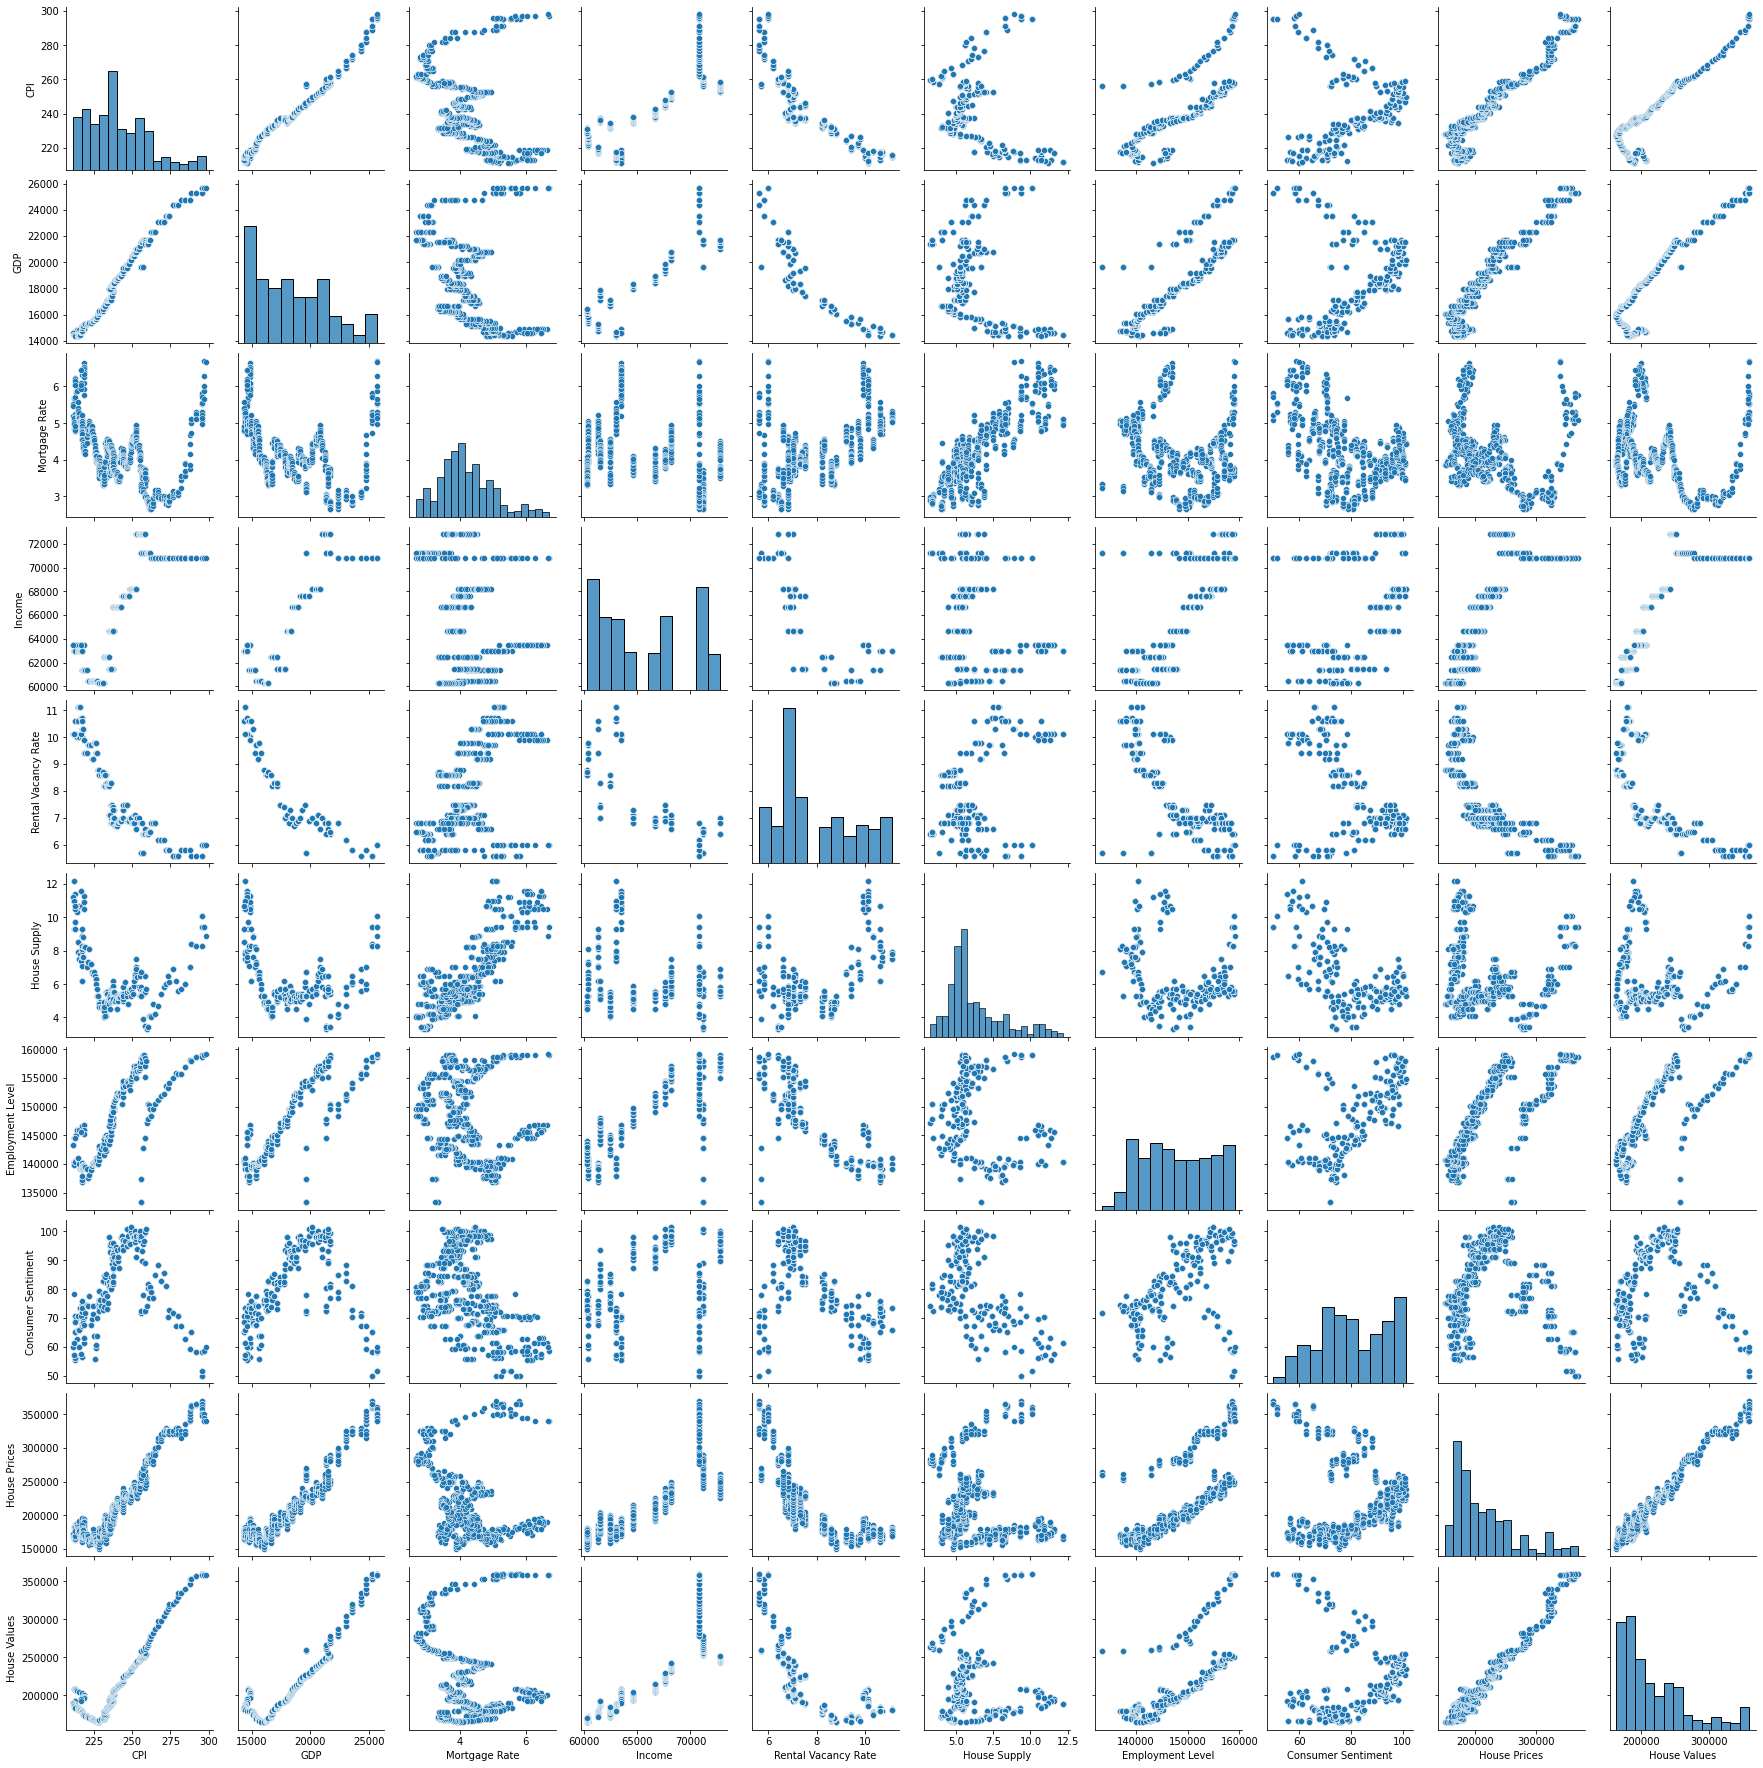

In [ ]:
sns.pairplot(df)

plot the heat map to show the correlation of the data frame

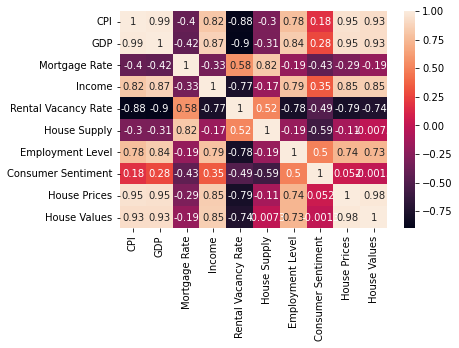

In [ ]:
sns.heatmap(df.corr(), annot=True)

Create a list of predictors which are variables that will be used to make the predictions.

Target is the column which the model is trying to predict. Change the target to "House Prices" for prediction on house prices or change to "House Values" for prediction on house values

In [ ]:
predictors = df[["CPI", "GDP", "Mortgage Rate", "Income", "Rental Vacancy Rate", "House Supply", "Employment Level", "Consumer Sentiment"]]

target = df["House Prices"]

I will use the scikit library for the machine learning model

In [ ]:
from sklearn.model_selection import train_test_split

Here I create the training and testing dataset. The train_test_split function will use the predictors and target variables to create a test set and train set of data. test_size = 0.5 means the test set will be 50% of the data while the train set is also 50% of the data. The random_state=1 will ensure the results will be the same every time the code is run which allows for other people to replicate the results.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.5, random_state=1)

import LinearRegression from sklearn to be able to conduct linear regression analysis

In [ ]:
from sklearn.linear_model import LinearRegression

Creating variable pred and storing the object LinearRegression()

In [ ]:
pred = LinearRegression()

Training the linear regression model by fitting the X_train and y_train dataset

In [ ]:
pred.fit(X_train, y_train)

LinearRegression()

Looking at the coefficients of the predictors

In [ ]:
coeff = pd.DataFrame(pred.coef_,predictors.columns,columns=["Coefficient"])

In [ ]:
coeff

,Coefficient
CPI,284.614872
GDP,14.331122
Mortgage Rate,-102.762080
Income,2.138073
Rental Vacancy Rate,-373.519920
House Supply,2915.353302
Employment Level,-0.733099
Consumer Sentiment,-668.350221


Predict the model by creating a prediction variable and giving the test dataset X_test

In [ ]:
prediction = pred.predict(X_test)

Looking at the actual price and predicted prices by the model

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
df

,Actual,Predicted
265,175100.0,182100.908053
519,236000.0,233775.339672
584,255000.0,259532.567027
717,341500.0,340373.425574
90,169900.0,167472.084224
...,...,...
232,177000.0,174276.989954
685,327000.0,304820.737133
614,255025.0,255383.731312
203,153000.0,173470.612859


plotting the prediction against the y_test (target variable) using plt.scatter from matplotlib.

I label the axis and give the graph a title.

Lastly, I save the graph as an svg and set the dpi to 1200 to create a high quality image so that it doesn't become pixelated when the image is inserted into the website. The bbox_inches="tight" was included to make sure all the axis and titles could be seen in the image.

Text(0.0, 1.0, 'Source: FRED and Zillow')

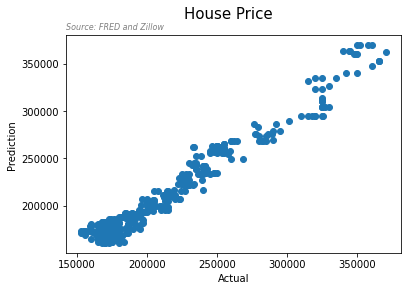

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.figure import Figure
plt.scatter(y_test, prediction)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.suptitle('House Price', size=15)
plt.title('Source: FRED and Zillow', size=8, loc='left', style='italic', color='gray')

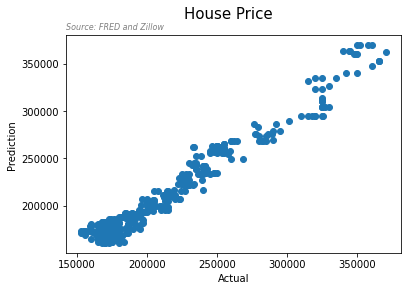

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.figure import Figure
plt.scatter(y_test, prediction)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.suptitle('House Price', size=15)
plt.title('Source: FRED and Zillow', size=8, loc='left', style='italic', color='gray')
plt.savefig('graph33_HP.svg', format='svg', dpi=1200, bbox_inches="tight")

Repeat the process above for house value index

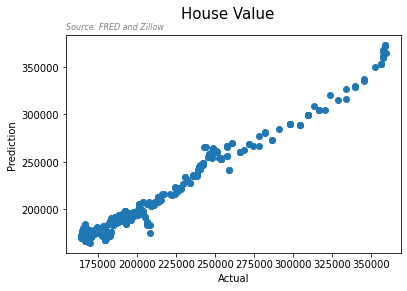

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.figure import Figure
plt.scatter(y_test, prediction)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.suptitle('House Value', size=15)
plt.title('Source: FRED and Zillow', size=8, loc='left', style='italic', color='gray')
plt.savefig('graph34_HVI.svg', format='svg', dpi=1200, bbox_inches="tight")

using sns.distplot to see the distribution of the data for the house value index and house price index

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


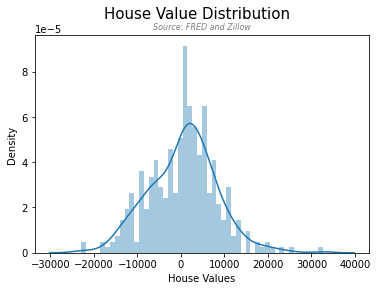

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.figure import Figure

sns.distplot((y_test-prediction),bins=50);
plt.suptitle('House Value Distribution', size=15)
plt.title('Source: FRED and Zillow', size=8, loc='center', style='italic', color='gray')
plt.savefig('graph40_HVI.svg', format='svg', dpi=1200, bbox_inches="tight")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


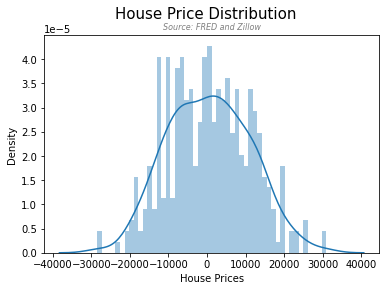

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.figure import Figure
plt.suptitle('House Price Distribution', size=15)
plt.title('Source: FRED and Zillow', size=8, loc='center', style='italic', color='gray')
sns.distplot((y_test-prediction),bins=50);
plt.savefig('graph41_HP.svg', format='svg', dpi=1200, bbox_inches="tight")